In [13]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
# from nodes.HR import HR
from nodes.HH import HH
from connect.ws_small_world import create_sw
from synapse.synapse import synbase
from utils.statistics import cal_cv, cal_synFactor
from utils.utils import spikevent
from utils.utils_plot import plot_firing_raster

In [14]:
seed = 0
np.random.seed(seed)                # 给numpy设置随机种子

# 创建神经元

In [15]:
N = 10
pre = HH(N=N)
# post = pre
post = HH(N=N)

In [16]:
# 初始化神经元
time = []
mem = []
time2 = []
mem2 = []
for i in range(10000):
    pre()
    post()
    time.append(pre.t)
    mem.append(pre.mem.copy())
    mem2.append(post.mem.copy())
# mem = np.array(mem)

In [17]:
# mem = np.array(mem)

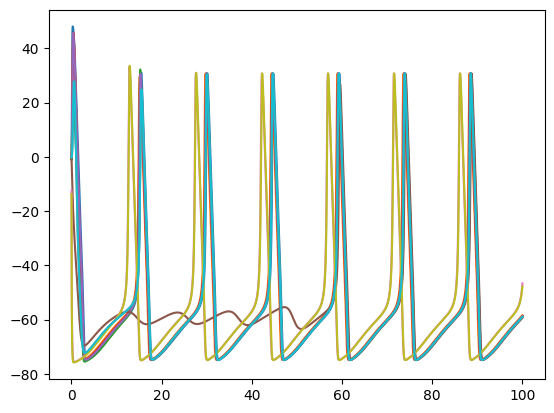

In [18]:
plt.plot(time, mem2)

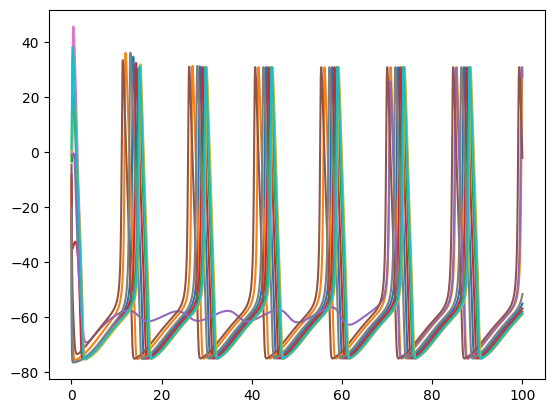

In [19]:
plt.plot(time, mem)

In [20]:
Num = int(N)
conn = create_sw(Num, 2, 0.5)

In [21]:
syn = synbase(pre, post, conn=conn, synType="electr")   # ["electr", "chem_Alpha"]

In [22]:
time = []
mem = []
mem2 = []
for i in range(10000):
    syn()
    time.append(syn.t)
    mem.append(syn.post.mem.copy())
    mem2.append(syn.pre.mem.copy())

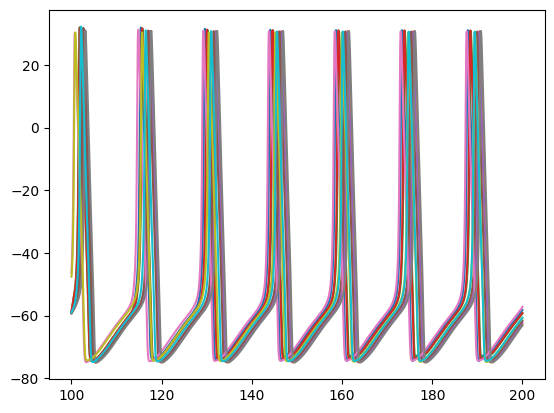

In [23]:
plt.plot(time, mem)

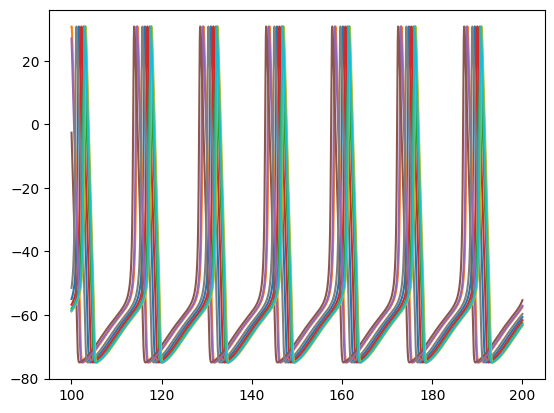

In [24]:
plt.plot(time, mem2)